In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# Operações com o dado licitação

#### O separador do arquigo é vírgula, porém o DS_OBJETO às vezes tinha vírgula na decrição, então dei um sed 's/, / /g' para substituir as vírgulas espaço por espaço

In [2]:
licitacoes=pd.read_csv('2016/licitacao_editada.csv', sep = ',', low_memory=False)

In [4]:
print(licitacoes.columns.values)

['CD_ORGAO' 'NM_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE'
 'NR_COMISSAO' 'ANO_COMISSAO' 'TP_COMISSAO' 'NR_PROCESSO' 'ANO_PROCESSO'
 'TP_OBJETO' 'CD_TIPO_FASE_ATUAL' 'TP_LICITACAO' 'TP_NIVEL_JULGAMENTO'
 'DT_AUTORIZACAO_ADESAO' 'TP_CARACTERISTICA_OBJETO' 'TP_NATUREZA'
 'TP_REGIME_EXECUCAO' 'BL_PERMITE_SUBCONTRATACAO' 'TP_BENEFICIO_MICRO_EPP'
 'TP_FORNECIMENTO' 'TP_ATUACAO_REGISTRO' 'NR_LICITACAO_ORIGINAL'
 'ANO_LICITACAO_ORIGINAL' 'NR_ATA_REGISTRO_PRECO' 'DT_ATA_REGISTRO_PRECO'
 'PC_TAXA_RISCO' 'TP_EXECUCAO' 'TP_DISPUTA' 'TP_PREQUALIFICACAO'
 'BL_INVERSAO_FASES' 'TP_RESULTADO_GLOBAL' 'CNPJ_ORGAO_GERENCIADOR'
 'NM_ORGAO_GERENCIADOR' 'DS_OBJETO' 'CD_TIPO_FUNDAMENTACAO' 'NR_ARTIGO'
 'DS_INCISO' 'DS_LEI' 'DT_INICIO_INSCR_CRED' 'DT_FIM_INSCR_CRED'
 'DT_INICIO_VIGEN_CRED' 'DT_FIM_VIGEN_CRED' 'VL_LICITACAO'
 'BL_ORCAMENTO_SIGILOSO' 'BL_RECEBE_INSCRICAO_PER_VIG'
 'BL_PERMITE_CONSORCIO' 'DT_ABERTURA' 'DT_HOMOLOGACAO' 'DT_ADJUDICACAO'
 'BL_LICIT_PROPRIA_ORGAO' 'TP_DOCUMENTO_FORNE

In [5]:
licitacoes

CD_ORGAO                               NM_ORGAO  NR_LICITACAO  \
0         84100                 PM DE ESPERANÇA DO SUL           1.0   
1         84100                 PM DE ESPERANÇA DO SUL           4.0   
2         82701                        CM DE XANGRI-LÁ           1.0   
3         84100                 PM DE ESPERANÇA DO SUL           6.0   
4         63900                         PM DE COTIPORÃ          36.0   
...         ...                                    ...           ...   
30461     53302  INST. PREV. ASSIST. MUN. - NOVA PRATA           8.0   
30462     44500                           PM DE CANOAS           2.0   
30463     46300                      PM DE DOIS IRMÃOS          24.0   
30464     46300                      PM DE DOIS IRMÃOS           4.0   
30465     49100                         PM DE GRAVATAÍ           2.0   

       ANO_LICITACAO CD_TIPO_MODALIDADE  NR_COMISSAO  ANO_COMISSAO  \
0               2016                CNV         12.0        2016.0   
1               2016                CNV         12.0        2016.0   
2               2016                PRP         12.0        2016.0   
3               2016                CNV         12.0        2016.0   
4               2016                PRD          NaN           NaN   
...              ...                ...          ...           ...   
30461           2016                PRD          NaN           NaN   
30462           2016                PRE        139.0        2019.0   
30463           2016                CNV        445.0        2017.0   
30464           2016                CHP        445.0        2017.0   
30465           2016                PRE       1335.0        2015.0   

      TP_COMISSAO NR_PROCESSO ANO_PROCESSO  ... TP_DOCUMENTO_FORNECEDOR  \
0               P         001         2016  ...                     NaN   
1               P         003         2016  ...                     NaN   
2               G          01         2016  ...                     NaN   
3               P         005         2016  ...                     NaN   
4             NaN         344         2016  ...                       J   
...           ...         ...          ...  ...                     ...   
30461         NaN           8         2016  ...                       J   
30462           G         958         2016  ...                     NaN   
30463           P         142         2016  ...                     NaN   
30464           P         110         2016  ...                     NaN   
30465           G           3         2016  ...                     NaN   

      NR_DOCUMENTO_FORNECEDOR TP_DOCUMENTO_VENCEDOR NR_DOCUMENTO_VENCEDOR  \
0                         NaN                     J          6.233397e+12   
1                         NaN                   NaN                   NaN   
2                         NaN                   NaN                   NaN   
3                         NaN                   NaN                   NaN   
4              09255424000171                   NaN                   NaN   
...                       ...                   ...                   ...   
30461          17284774000194                   NaN                   NaN   
30462                     NaN                   NaN                   NaN   
30463                     NaN                     J          6.354367e+12   
30464                     NaN                   NaN                   NaN   
30465                     NaN                   NaN                   NaN   

      VL_HOMOLOGADO BL_GERA_DESPESA DS_OBSERVACAO PC_TX_ESTIMADA  \
0           6420.00               S           NaN            NaN   
1               NaN               S           NaN            NaN   
2               NaN               S           NaN            NaN   
3               NaN               S           NaN            NaN   
4               NaN               S           NaN            NaN   
...             ...             ...           ...            ...   

# Checando quantos valores faltantes existem

In [6]:
pd.set_option('display.max_rows', 1000)
print("Missing values: ", licitacoes.isnull().sum())

Missing values:  CD_ORGAO                           0
NM_ORGAO                           0
NR_LICITACAO                       0
ANO_LICITACAO                      0
CD_TIPO_MODALIDADE                 0
NR_COMISSAO                     8544
ANO_COMISSAO                    8544
TP_COMISSAO                     8524
NR_PROCESSO                        0
ANO_PROCESSO                       0
TP_OBJETO                          0
CD_TIPO_FASE_ATUAL                 0
TP_LICITACAO                       0
TP_NIVEL_JULGAMENTO               36
DT_AUTORIZACAO_ADESAO          30313
TP_CARACTERISTICA_OBJETO           0
TP_NATUREZA                       32
TP_REGIME_EXECUCAO             23533
BL_PERMITE_SUBCONTRATACAO       7545
TP_BENEFICIO_MICRO_EPP            19
TP_FORNECIMENTO                12086
TP_ATUACAO_REGISTRO            27841
NR_LICITACAO_ORIGINAL          30317
ANO_LICITACAO_ORIGINAL         24818
NR_ATA_REGISTRO_PRECO          30317
DT_ATA_REGISTRO_PRECO          30318
PC_TAXA_RISCO        

# Escolhendo as principais colunas e com poucos valores faltantes para formação do dataframe

In [3]:
df = licitacoes.loc[:,['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL', 'TP_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO']]

In [8]:
df

CD_ORGAO                               NM_ORGAO  NR_LICITACAO  \
0         84100                 PM DE ESPERANÇA DO SUL           1.0   
1         84100                 PM DE ESPERANÇA DO SUL           4.0   
2         82701                        CM DE XANGRI-LÁ           1.0   
3         84100                 PM DE ESPERANÇA DO SUL           6.0   
4         63900                         PM DE COTIPORÃ          36.0   
...         ...                                    ...           ...   
30461     53302  INST. PREV. ASSIST. MUN. - NOVA PRATA           8.0   
30462     44500                           PM DE CANOAS           2.0   
30463     46300                      PM DE DOIS IRMÃOS          24.0   
30464     46300                      PM DE DOIS IRMÃOS           4.0   
30465     49100                         PM DE GRAVATAÍ           2.0   

       ANO_LICITACAO CD_TIPO_MODALIDADE NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
0               2016                CNV         001         2016       OUS   
1               2016                CNV         003         2016       COM   
2               2016                PRP          01         2016       COM   
3               2016                CNV         005         2016       COM   
4               2016                PRD         344         2016       CSE   
...              ...                ...         ...          ...       ...   
30461           2016                PRD           8         2016       CSE   
30462           2016                PRE         958         2016       COM   
30463           2016                CNV         142         2016       CSE   
30464           2016                CHP         110         2016       CSE   
30465           2016                PRE           3         2016       CSE   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  \
0                    ADH          MPR   
1                    ADH          MPR   
2                    ADH          MPR   
3                    ADH          MPR   
4                    PUB          NSA   
...                  ...          ...   
30461                PUB          NSA   
30462                ADH          MPR   
30463                ADH          MPR   
30464                ADH          MPR   
30465                EPU          MPR   

                                               DS_OBJETO VL_LICITACAO  
0      Contratação de arbitragem dos jogos do 2º camp...      7000.00  
1                          Aquisição de merenda escolar      11216.50  
2      AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...          NaN  
3      Aquisição de materiais de limpeza para as dive...     59810.60  
4      CONTRATAÇÃO DE EMPRESA PARA FORNECIMENTO E INS...      3835.00  
...                                                  ...          ...  
30461  MONITORAMENTO DE ALARME 24 HORAS SISTEMA DE CÂ...      2220.00  
30462  Registro de Preços para Fórmulas Infantis em a...    519172.20  
30463  Contratação de empresa especializada para a co...      4075.50  
30464  gêneros alimentícios da agricultura familiar p...    118133.60  
30465  Contratação de Empresa Para Prestação de Servi...    501955.08  

[30466 rows x 12 columns]

### Alguns valores no campo valor licitação estava com valores S e N que seriam de outra coluna, então tirei as linhas que estavam com esses valores errôneos

In [4]:
new_df = df[df.VL_LICITACAO != ('S' or 'N')]

In [10]:
new_df

CD_ORGAO                               NM_ORGAO  NR_LICITACAO  \
0         84100                 PM DE ESPERANÇA DO SUL           1.0   
1         84100                 PM DE ESPERANÇA DO SUL           4.0   
2         82701                        CM DE XANGRI-LÁ           1.0   
3         84100                 PM DE ESPERANÇA DO SUL           6.0   
4         63900                         PM DE COTIPORÃ          36.0   
...         ...                                    ...           ...   
30461     53302  INST. PREV. ASSIST. MUN. - NOVA PRATA           8.0   
30462     44500                           PM DE CANOAS           2.0   
30463     46300                      PM DE DOIS IRMÃOS          24.0   
30464     46300                      PM DE DOIS IRMÃOS           4.0   
30465     49100                         PM DE GRAVATAÍ           2.0   

       ANO_LICITACAO CD_TIPO_MODALIDADE NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
0               2016                CNV         001         2016       OUS   
1               2016                CNV         003         2016       COM   
2               2016                PRP          01         2016       COM   
3               2016                CNV         005         2016       COM   
4               2016                PRD         344         2016       CSE   
...              ...                ...         ...          ...       ...   
30461           2016                PRD           8         2016       CSE   
30462           2016                PRE         958         2016       COM   
30463           2016                CNV         142         2016       CSE   
30464           2016                CHP         110         2016       CSE   
30465           2016                PRE           3         2016       CSE   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  \
0                    ADH          MPR   
1                    ADH          MPR   
2                    ADH          MPR   
3                    ADH          MPR   
4                    PUB          NSA   
...                  ...          ...   
30461                PUB          NSA   
30462                ADH          MPR   
30463                ADH          MPR   
30464                ADH          MPR   
30465                EPU          MPR   

                                               DS_OBJETO VL_LICITACAO  
0      Contratação de arbitragem dos jogos do 2º camp...      7000.00  
1                          Aquisição de merenda escolar      11216.50  
2      AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...          NaN  
3      Aquisição de materiais de limpeza para as dive...     59810.60  
4      CONTRATAÇÃO DE EMPRESA PARA FORNECIMENTO E INS...      3835.00  
...                                                  ...          ...  
30461  MONITORAMENTO DE ALARME 24 HORAS SISTEMA DE CÂ...      2220.00  
30462  Registro de Preços para Fórmulas Infantis em a...    519172.20  
30463  Contratação de empresa especializada para a co...      4075.50  
30464  gêneros alimentícios da agricultura familiar p...    118133.60  
30465  Contratação de Empresa Para Prestação de Servi...    501955.08  

[30459 rows x 12 columns]

# Checando os valores faltantes do novo dataframe

In [11]:
print("Missing values: ", new_df.isnull().sum())

Missing values:  CD_ORGAO                 0
NM_ORGAO                 0
NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
NR_PROCESSO              0
ANO_PROCESSO             0
TP_OBJETO                0
CD_TIPO_FASE_ATUAL       0
TP_LICITACAO             0
DS_OBJETO               35
VL_LICITACAO          1027
dtype: int64


# Removendo as linhas que contém dados faltantes

In [5]:
licitacoes_nova = new_df.dropna(subset=['DS_OBJETO', 'VL_LICITACAO'])

In [13]:
print("Missing values: ", licitacoes_nova.isnull().sum())

Missing values:  CD_ORGAO              0
NM_ORGAO              0
NR_LICITACAO          0
ANO_LICITACAO         0
CD_TIPO_MODALIDADE    0
NR_PROCESSO           0
ANO_PROCESSO          0
TP_OBJETO             0
CD_TIPO_FASE_ATUAL    0
TP_LICITACAO          0
DS_OBJETO             0
VL_LICITACAO          0
dtype: int64


In [14]:
for column in licitacoes_nova.columns:
     print("\n" + column)
     print(licitacoes_nova[column].value_counts())


CD_ORGAO
49100    459
49300    382
46900    373
54400    326
53500    312
52300    293
88261    290
57200    289
58400    279
63000    264
66700    264
45000    259
43000    249
63400    248
56800    247
53400    247
83100    240
56900    239
52600    216
61600    209
82700    209
88038    207
44500    206
50100    193
51200    175
61500    175
45004    173
51700    168
52400    162
44700    159
57800    154
51300    151
48900    150
43900    145
64100    142
52900    142
62700    139
48100    139
88021    138
63500    137
45003    136
47600    135
54901    134
47500    127
51100    126
62600    126
62200    126
62400    125
58500    123
61400    122
54912    122
58300    120
55600    120
47800    117
69100    116
48500    115
53411    114
63900    112
44300    111
61900    106
88319    106
57100    105
81000    104
50900    104
60200    101
47700    101
44900     99
46500     99
40900     97
48800     95
54600     95
50000     95
57400     93
41400     93
88225     91
88048     90
60

# Selecionando as licitações cujo TP_OBJETO seja compra, como foi sugerido no pdf da descrição do teste técnico

In [6]:
licitacoes_compra = licitacoes_nova[licitacoes_nova['TP_OBJETO'] == 'COM']

# Checando se há linhas duplicadas

In [16]:
print("Duplicated values: ", df.duplicated().sum())

Duplicated values:  0


# Convertendo a coluna de VL_LICITAÇÃO em float

In [7]:
licitacoes_compra['VL_LICITACAO'] = pd.to_numeric(licitacoes_compra['VL_LICITACAO'],errors='coerce')
licitacoes_compra.dtypes

/home/thais/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CD_ORGAO                int64
NM_ORGAO               object
NR_LICITACAO          float64
ANO_LICITACAO           int64
CD_TIPO_MODALIDADE     object
NR_PROCESSO            object
ANO_PROCESSO           object
TP_OBJETO              object
CD_TIPO_FASE_ATUAL     object
TP_LICITACAO           object
DS_OBJETO              object
VL_LICITACAO          float64
dtype: object

# Checando a estatística dos valores de licitação

In [18]:
licitacoes_compra['VL_LICITACAO'].describe()

count    1.186500e+04
mean     3.226342e+05
std      9.027155e+06
min      0.000000e+00
25%      5.101730e+03
50%      2.069466e+04
75%      7.614000e+04
max      7.915486e+08
Name: VL_LICITACAO, dtype: float64

# Observando quais palavras são mais relevantes na descrição do objeto (DS_OBJETO) das compras para tentar saber quais foram os objetos que tiveram mais gastos públicos

In [19]:
def nuvem_palavras(coluna_dataframe):
    
    palavras = ''
    stopwords= set(STOPWORDS)

    # Lista de palavras que não serão contabilizadas
    novas_palavras = ["de", "da", "do", "para", "dos", "das", 
                     "em", "aquisição", "por", "preço", "registro", 
                     "preços", "um", "através", "na", "no", "ou", 
                      "preco", "compra", "aquisição", "aquisicao", "uso", 
                      "realizada", "despesa", "2019", "nº", "rs", "bonito",
                      "processo", "objeto"]

    with open("stop_words_pt.txt", 'r') as f:
        [novas_palavras.append(palavras) for linha in f for palavras in linha.split()]

    nova_stopwords = stopwords.union(novas_palavras)

    for val in coluna_dataframe: 

        # converter cada linha para string 
        val = str(val) 

        # splitar cada linha em uma lista de palavras (tokens)
        tokens = val.split() 

        # Converter cada token em letra minuscula
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        palavras += " ".join(tokens)+" "

    # Formando a nunvem de palavras    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = nova_stopwords, 
                    min_font_size = 10).generate(palavras) 

    # Plotando a imagem de nuvem de palavras                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

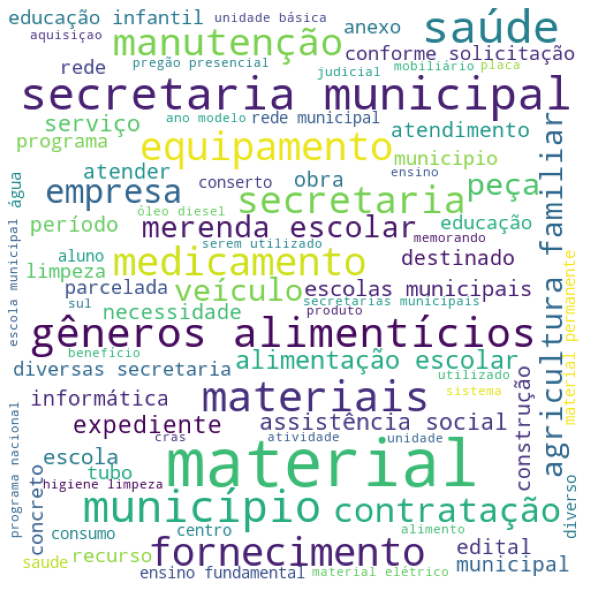

In [20]:
nuvem_palavras(licitacoes_compra.DS_OBJETO)

# Trabalhando com os dados licitante e proposta

In [8]:
licitantes=pd.read_csv('2016/licitante.csv', sep = ',', low_memory=False)
propostas=pd.read_csv('2016/proposta.csv', sep = ',', low_memory=False)

In [22]:
licitantes

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE TP_DOCUMENTO  \
0         71700            17           2016                PRP            J   
1         71700            17           2016                PRP            J   
2         77200             9           2016                CNV            J   
3         53100             1           2016                TMP            J   
4         53100             4           2016                CNV            J   
...         ...           ...            ...                ...          ...   
55167     63900            19           2016                TMP            J   
55168     63900            18           2016                TMP            J   
55169     63900            18           2016                TMP            J   
55170     75000            19           2016                PRP            J   
55171     55701             2           2016                CNV            J   

         NR_DOCUMENTO TP_DOCUMENTO.1 NR_DOCUMENTO.1 TP_CONDICAO  \
0      88599162000139              F    94391190044         NaN   
1       9053409000140              F    64558959087         NaN   
2       4170780000179              F    99430215000         CEP   
3       9616071000198              F    28669584034         NaN   
4       9616071000198              F    28669584034         CEP   
...               ...            ...            ...         ...   
55167   8863707000133            NaN            NaN         NaN   
55168   8863707000133            NaN            NaN         NaN   
55169   7245458000150            NaN            NaN         NaN   
55170  94479995000169            NaN            NaN         NaN   
55171  95425369001043            NaN            NaN         CEP   

      TP_RESULTADO_HABILITACAO BL_BENEFICIO_MICRO_EPP  
0                          NaN                    NaN  
1                          NaN                    NaN  
2                          NaN                    NaN  
3                            H                    NaN  
4                          NaN                    NaN  
...                        ...                    ...  
55167                      NaN                      S  
55168                      NaN                      S  
55169                      NaN                      S  
55170                      NaN                    NaN  
55171                        H                      N  

[55172 rows x 11 columns]

In [24]:
propostas

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE TP_DOCUMENTO  \
0         77200            15           2016                PRP            J   
1         77200            17           2016                CNV            J   
2         77200             9           2016                CNV            J   
3         55701             2           2016                CNV            J   
4         53100            13           2016                TMP            J   
...         ...           ...            ...                ...          ...   
55167     88037             2           2016                TMP            F   
55168     66700           682           2016                CHP            F   
55169     59400            11           2016                PRP            F   
55170     82300             4           2016                CHP            F   
55171     62900             1           2016                CHP            F   

         NR_DOCUMENTO DT_PROPOSTA TP_RESULTADO_PROPOSTA  VL_TOTAL_PROPOSTA  \
0       8774832000177  2016-05-12                   NaN           57192.00   
1      14465175000189  2017-01-03                   NaN           24448.38   
2      14465175000189  2016-06-27                   NaN           25145.25   
3      95425369001043  2016-12-22                     C           12297.00   
4       9616071000198  2016-12-26                     C          255580.68   
...               ...         ...                   ...                ...   
55167     34725369004  2016-06-23                   NaN             348.00   
55168     34735038000  2016-08-09                   NaN            4056.15   
55169     36908371034  2016-04-19                     C           16000.00   
55170     45964700063  2016-09-28                   NaN             416.00   
55171     49658280030  2016-08-25                   NaN           11537.41   

       PC_DESCONTO  VL_NOTA_TECNICA DT_HOMOLOGACAO  PC_TX  
0              NaN              NaN            NaN    NaN  
1              NaN              NaN            NaN    NaN  
2              NaN              NaN            NaN    NaN  
3              NaN              NaN            NaN    NaN  
4              NaN              NaN            NaN    NaN  
...            ...              ...            ...    ...  
55167          NaN              NaN     2016-07-05    NaN  
55168          0.0              0.0            NaN    NaN  
55169          NaN              NaN            NaN    NaN  
55170          NaN              NaN            NaN    NaN  
55171          NaN              NaN            NaN    NaN  

[55172 rows x 13 columns]

# Esses dados tem relacionamento 1:1 e as colunas abaixo, são iguais em ambos os dados, então eu posso juntar esses 2 dados em um só

In [9]:
licitante_propostas = pd.merge(licitantes, propostas, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'TP_DOCUMENTO', 'NR_DOCUMENTO'])

In [26]:
licitante_propostas

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE TP_DOCUMENTO  \
0         71700            17           2016                PRP            J   
1         71700            17           2016                PRP            J   
2         77200             9           2016                CNV            J   
3         53100             1           2016                TMP            J   
4         53100             4           2016                CNV            J   
...         ...           ...            ...                ...          ...   
55169     63900            19           2016                TMP            J   
55170     63900            18           2016                TMP            J   
55171     63900            18           2016                TMP            J   
55172     75000            19           2016                PRP            J   
55173     55701             2           2016                CNV            J   

         NR_DOCUMENTO TP_DOCUMENTO.1 NR_DOCUMENTO.1 TP_CONDICAO  \
0      88599162000139              F    94391190044         NaN   
1       9053409000140              F    64558959087         NaN   
2       4170780000179              F    99430215000         CEP   
3       9616071000198              F    28669584034         NaN   
4       9616071000198              F    28669584034         CEP   
...               ...            ...            ...         ...   
55169   8863707000133            NaN            NaN         NaN   
55170   8863707000133            NaN            NaN         NaN   
55171   7245458000150            NaN            NaN         NaN   
55172  94479995000169            NaN            NaN         NaN   
55173  95425369001043            NaN            NaN         CEP   

      TP_RESULTADO_HABILITACAO BL_BENEFICIO_MICRO_EPP DT_PROPOSTA  \
0                          NaN                    NaN  2017-01-05   
1                          NaN                    NaN  2017-01-05   
2                          NaN                    NaN  2016-06-27   
3                            H                    NaN  2016-04-25   
4                          NaN                    NaN  2016-04-27   
...                        ...                    ...         ...   
55169                      NaN                      S  2017-01-09   
55170                      NaN                      S  2017-01-03   
55171                      NaN                      S  2017-01-03   
55172                      NaN                    NaN  2016-09-01   
55173                        H                      N  2016-12-22   

      TP_RESULTADO_PROPOSTA  VL_TOTAL_PROPOSTA  PC_DESCONTO  VL_NOTA_TECNICA  \
0                       NaN          614125.00          NaN              NaN   
1                       NaN          571480.00          NaN              NaN   
2                       NaN           26253.48          NaN              NaN   
3                         C          177118.12          NaN              NaN   
4                       NaN                NaN          NaN              NaN   
...                     ...                ...          ...              ...   
55169                   NaN           16950.70          NaN              NaN   
55170                   NaN           65849.24          NaN              NaN   
55171                   NaN           61720.40          NaN              NaN   
55172                   NaN            5487.55          NaN              NaN   
55173                     C           12297.00          NaN              NaN   

      DT_HOMOLOGACAO  PC_TX  
0                NaN    NaN  
1                NaN    NaN  
2                NaN    NaN  
3                NaN    NaN  
4                NaN    NaN  
...              ...    ...  
55169            NaN    NaN  
55170            NaN    NaN  
55171            NaN    NaN  
55172            NaN    NaN  
55173            NaN    NaN  

[55174 rows x 18 columns]

# Checando valores faltantes

In [27]:
print("Missing values: ", licitante_propostas.isnull().sum())

Missing values:  CD_ORGAO                        0
NR_LICITACAO                    0
ANO_LICITACAO                   0
CD_TIPO_MODALIDADE              0
TP_DOCUMENTO                    0
NR_DOCUMENTO                    0
TP_DOCUMENTO.1              13972
NR_DOCUMENTO.1              13972
TP_CONDICAO                 42995
TP_RESULTADO_HABILITACAO    46898
BL_BENEFICIO_MICRO_EPP      11657
DT_PROPOSTA                     0
TP_RESULTADO_PROPOSTA       44375
VL_TOTAL_PROPOSTA            8790
PC_DESCONTO                 39723
VL_NOTA_TECNICA             43679
DT_HOMOLOGACAO              45552
PC_TX                       55162
dtype: int64


# Checando valores duplicados

In [28]:
print("Duplicated values: ", licitante_propostas.duplicated().sum())

Duplicated values:  0


# Observando as estatísticas das colunas que são valores numéricos

In [29]:
licitante_propostas.describe()

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO  NR_DOCUMENTO  \
count  55174.000000  5.517400e+04        55174.0  5.517400e+04   
mean   60590.544659  1.812448e+14         2016.0  2.594957e+13   
std    14016.683292  4.257285e+16            0.0  3.216846e+13   
min      300.000000  1.000000e+00         2016.0  1.910000e+02   
25%    49200.000000  9.000000e+00         2016.0  5.531725e+12   
50%    57600.000000  2.600000e+01         2016.0  1.154729e+13   
75%    69800.000000  8.600000e+01         2016.0  2.270962e+13   
max    88345.000000  1.000000e+19         2016.0  9.871446e+13   

       VL_TOTAL_PROPOSTA   PC_DESCONTO  VL_NOTA_TECNICA      PC_TX  
count       4.638400e+04  15451.000000     11495.000000  12.000000  
mean        2.961664e+05      0.075069         0.276746   0.420833  
std         1.781409e+07      2.265549         5.435538   1.018345  
min        -1.650000e+01      0.000000         0.000000   0.000000  
25%         2.700000e+03      0.000000         0.000000   0.000000  
50%         1.498200e+04      0.000000         0.000000   0.000000  
75%         5.969850e+04      0.000000         0.000000   0.000000  
max         3.695137e+09    121.030000       218.580000   3.150000

# Remover as linhas que têm dados faltantes em VL_TOTAL_PROPOSTA

In [10]:
licitante_propostas_nova = licitante_propostas.dropna(subset=['VL_TOTAL_PROPOSTA'])

# Checando os valores faltantes no novo dataframe

In [31]:
print("Missing values: ", licitante_propostas_nova.isnull().sum())

Missing values:  CD_ORGAO                        0
NR_LICITACAO                    0
ANO_LICITACAO                   0
CD_TIPO_MODALIDADE              0
TP_DOCUMENTO                    0
NR_DOCUMENTO                    0
TP_DOCUMENTO.1              10021
NR_DOCUMENTO.1              10021
TP_CONDICAO                 38137
TP_RESULTADO_HABILITACAO    40332
BL_BENEFICIO_MICRO_EPP      10102
DT_PROPOSTA                     0
TP_RESULTADO_PROPOSTA       35941
VL_TOTAL_PROPOSTA               0
PC_DESCONTO                 31261
VL_NOTA_TECNICA             34947
DT_HOMOLOGACAO              37070
PC_TX                       46372
dtype: int64


# Criando um novo dataframe com as colunas mais importantes e com poucos dados faltantes

In [14]:
licitacoes_vencedoras = licitante_propostas_nova.loc[:,['CD_ORGAO','NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_DOCUMENTO', 'DT_PROPOSTA', 'VL_TOTAL_PROPOSTA', 'TP_RESULTADO_PROPOSTA']]

# Criando um dataframe apenas com as licitação que têm o resultado da posposta (vencedora, perdedora ou pendente)

In [15]:
licitacoes_vencedoras = licitacoes_vencedoras.dropna(subset=['TP_RESULTADO_PROPOSTA'])

# Escolhendo apenas as licitações classificadas como vencedoras

In [13]:
licitacoes_vencedoras = licitacoes_vencedoras[licitacoes_vencedoras['TP_RESULTADO_PROPOSTA'] == 'C']

In [35]:
licitacoes_vencedoras

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO CD_TIPO_MODALIDADE  \
3         53100             1           2016                TMP   
5         53100             5           2016                TMP   
6         53100             6           2016                CNV   
7         53100            12           2016                TMP   
8         53100             9           2016                TMP   
...         ...           ...            ...                ...   
55075     45200             3           2016                CNC   
55106     88028            21           2016                CNV   
55112     80200            20           2016                CNV   
55130     54901            44           2016                PRE   
55173     55701             2           2016                CNV   

         NR_DOCUMENTO DT_PROPOSTA  VL_TOTAL_PROPOSTA TP_RESULTADO_PROPOSTA  
3       9616071000198  2016-04-25          177118.12                     C  
5       9616071000198  2016-06-03          295023.43                     C  
6       9616071000198  2016-07-01            5648.62                     C  
7       9616071000198  2016-10-10          185485.82                     C  
8       9616071000198  2016-08-16          139010.43                     C  
...               ...         ...                ...                   ...  
55075     46214712015  2017-02-20           90100.00                     C  
55106  11199186000176  2016-11-24           54840.00                     C  
55112   6174253000168  2016-06-22           21016.39                     C  
55130  90180605000102  2016-10-26            6000.00                     C  
55173  95425369001043  2016-12-22           12297.00                     C  

[9693 rows x 8 columns]

# Juntando as licitações com licitantes e propostas

In [16]:
licitacoes_licitante_proposta = pd.merge(licitacoes_compra, licitacoes_vencedoras, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'])

/home/thais/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1097: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [17]:
licitacoes_licitante_proposta.to_csv('2016/tipos_licitacao_2016.txt')

In [37]:
licitacoes_licitante_proposta

CD_ORGAO                NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
0        86800  PM DE BOA VISTA DO SUL           4.0           2016   
1        47701           CM DE ESTRELA           1.0           2016   
2        47701           CM DE ESTRELA           1.0           2016   
3        77200       PM DE MATO LEITÃO           3.0           2016   
4        77200       PM DE MATO LEITÃO          10.0           2016   
...        ...                     ...           ...            ...   
1940     54900      PM DE PORTO ALEGRE         405.0           2016   
1941     54900      PM DE PORTO ALEGRE         405.0           2016   
1942     54900      PM DE PORTO ALEGRE         405.0           2016   
1943     53500            PM DE OSÓRIO          11.0           2016   
1944     78200   PM DE NOVA SANTA RITA          31.0           2016   

     CD_TIPO_MODALIDADE      NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
0                   PRP              011         2016       COM   
1                   PRP             6762         2016       COM   
2                   PRP             6762         2016       COM   
3                   PRP              014         2016       COM   
4                   PRP              071         2016       COM   
...                 ...              ...          ...       ...   
1940                PRE  001.008672.16.4         2016       COM   
1941                PRE  001.008672.16.4         2016       COM   
1942                PRE  001.008672.16.4         2016       COM   
1943                PRE           244246         2016       COM   
1944                PRE             4125         2016       COM   

     CD_TIPO_FASE_ATUAL TP_LICITACAO  \
0                   ADH          MPR   
1                   ADH          MPR   
2                   ADH          MPR   
3                   ADH          MPR   
4                   ADH          MPR   
...                 ...          ...   
1940                ADH          MPR   
1941                ADH          MPR   
1942                ADH          MPR   
1943                ADH          MPR   
1944                ADH          MPR   

                                              DS_OBJETO  VL_LICITACAO  \
0     Aquisição de quadros (lousas) para as escolas ...      14875.92   
1     Aquisição e instalação de um elevador tipo pla...      51085.00   
2     Aquisição e instalação de um elevador tipo pla...      51085.00   
3     compra de 1 motocicleta para o programa SUA NO...       7970.00   
4     Compra de cerca e portão de PVC para o Muro da...      10000.00   
...                                                 ...           ...   
1940  impressora laser mono e impressora laser mono ...     158470.71   
1941  impressora laser mono e impressora laser mono ...     158470.71   
1942  impressora laser mono e impressora laser mono ...     158470.71   
1943  AQUISIÇÃO DE HARDWARE SERVIDOR DESTINADO PARA ...      64000.00   
1944  Constitui objeto da presente licitação a contr...     286309.00   

        NR_DOCUMENTO DT_PROPOSTA  VL_TOTAL_PROPOSTA TP_RESULTADO_PROPOSTA  
0      8149396000145  2016-02-03           12720.00                     C  
1     90347840004539  2016-12-23           48000.00                     C  
2     20745692000104  2016-12-23           47900.00                     C  
3     89908727000690  2016-02-01            7499.00                     C  
4      8048278000140  2016-03-24            9500.00                     C  
...              ...         ...                ...                   ...  
1940  87138145000131  2016-12-20          138200.00                     C  
1941  95054573000104  2016-12-19           79471.00                     C  
1942   3843541000170  2016-12-20          121499.73                     C  
1943   2543216000129  2016-04-12           44990.00                     C  
1944  90341561000147  2016-11-20          261659.00                     C  

[1945 rows x 16 columns]

In [38]:
print("Missing values: ", licitacoes_licitante_proposta.isnull().sum())

Missing values:  CD_ORGAO                 0
NM_ORGAO                 0
NR_LICITACAO             0
ANO_LICITACAO            0
CD_TIPO_MODALIDADE       0
NR_PROCESSO              0
ANO_PROCESSO             0
TP_OBJETO                0
CD_TIPO_FASE_ATUAL       0
TP_LICITACAO             0
DS_OBJETO                0
VL_LICITACAO             0
NR_DOCUMENTO             0
DT_PROPOSTA              0
VL_TOTAL_PROPOSTA        0
TP_RESULTADO_PROPOSTA    0
dtype: int64


# Somando todos os valores de propostas das licitações vencedoras de acordo com os nome dos orgãos, a fim de saber qual orgão pediu e recebeu mais dinheiro nas propostas do ano

In [39]:
licitacoes_vencedoras_soma = pd.DataFrame(licitacoes_licitante_proposta.groupby(['NM_ORGAO']).sum()['VL_TOTAL_PROPOSTA']).sort_values(by=['VL_TOTAL_PROPOSTA'], ascending=False)

In [40]:
licitacoes_vencedoras_soma

VL_TOTAL_PROPOSTA
NM_ORGAO                                                             
PM DE PORTO ALEGRE                                       3.489230e+08
PM DE RIO GRANDE                                         5.129392e+07
CIA. DE DESENV. DE CAXIAS DO SUL                         1.618083e+07
CIA. CARRIS PORTO-ALEGRENSE                              8.844127e+06
PM DE SÃO VICENTE DO SUL                                 4.800044e+06
PM DE VIAMÃO                                             4.494399e+06
FUND. MÉD.-HOSP. DR. HONOR T. COSTA - LAVRAS DO...       2.996206e+06
PM DE FREDERICO WESTPHALEN                               2.967036e+06
PM DE XANGRI-LÁ                                          2.314000e+06
PM DE CANOAS                                             2.225080e+06
PM DE TUPARENDI                                          2.105530e+06
PM DE ALPESTRE                                           1.975281e+06
PM DE VISTA GAÚCHA                                       1.915058e+06
PM DE PASSO FUNDO                                        1.788472e+06
PM DE VENÂNCIO AIRES                                     1.610290e+06
PM DE IBIRUBÁ                                            1.523218e+06
PM DE RODEIO BONITO                                      1.205790e+06
PM DE MIRAGUAÍ                                           1.109862e+06
PM DE FORTALEZA DOS VALOS                                1.049901e+06
PM DE DOUTOR MAURÍCIO CARDOSO                            1.031409e+06
PM DE NOVA SANTA RITA                                    1.017949e+06
PM DE SANTO ÂNGELO                                       9.519466e+05
PM DE SEBERI                                             8.662128e+05
PM DE REDENTORA                                          8.522606e+05
PM DE VESPASIANO CORRÊA                                  8.171475e+05
PM DE LAJEADO                                            7.931760e+05
PM DE SALDANHA MARINHO                                   7.406903e+05
PM DE NOVA PÁDUA                                         7.182892e+05
PM DE CANELA                                             7.178620e+05
PM DE MORMAÇO                                            7.175007e+05
PM DE FORMIGUEIRO                                        6.884740e+05
PM DE NOVA CANDELÁRIA                                    6.835924e+05
PM DE RIOZINHO                                           6.670000e+05
PM DE ALECRIM                                            6.625077e+05
PM DE BARRA DO QUARAÍ                                    6.623220e+05
PM DE PALMARES DO SUL                                    6.402180e+05
PM DE ROCA SALES                                         6.151460e+05
PM DE IGREJINHA                                          5.481771e+05
PM DE PICADA CAFÉ                                        5.387228e+05
PM DE IMIGRANTE                                          5.064490e+05
PM DE BENTO GONÇALVES                                    4.879652e+05
PM DE VALE DO SOL                                        4.875000e+05
PM DE SANTA TEREZA                                       4.801500e+05
PM DE ESTRELA                                            4.759687e+05
PM DE ARROIO DO TIGRE                                    4.659886e+05
PM DE GIRUÁ                                              4.576923e+05
PM DE AUGUSTO PESTANA                                    4.207000e+05
PM DE MATO QUEIMADO                                      4.076700e+05
PM DE PORTÃO                                             4.049602e+05
PM DE FORQUETINHA                                        4.045723e+05
PM DE MONTAURI                                           4.037404e+05
PM DE SÃO PAULO DAS MISSÕES                              3.943165e+05
PM DE CAMBARÁ DO SUL                                     3.857560e+05
CONS. PÚBL. INTERM. P/ ASSUNTOS ESTRATÉGICOS DO...       3.690000e+05
PM DE HARMONIA                                           3.680240e+05
FUND. HOSPITALAR SANTA TEREZINHA DE ERECHIM              3.637

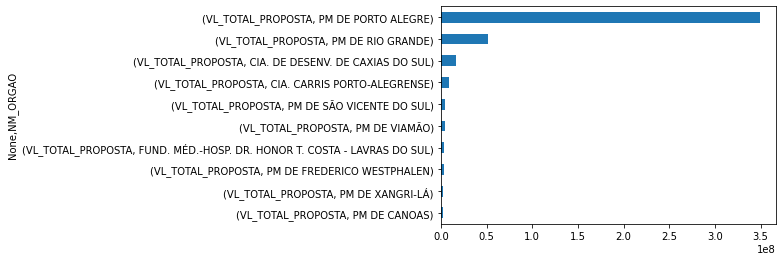

In [55]:
ax = licitacoes_vencedoras_soma[:10].unstack().plot.barh()
ax.invert_yaxis()

In [56]:
pd.DataFrame(licitacoes_licitante_proposta.groupby(['NM_ORGAO']).sum()['VL_LICITACAO']).sort_values(by=['VL_LICITACAO'], ascending=False)

VL_LICITACAO
NM_ORGAO                                                        
PM DE PORTO ALEGRE                                  3.586113e+08
PM DE TUPARENDI                                     2.042961e+08
PM DE SÃO VICENTE DO SUL                            1.047862e+08
CIA. DE DESENV. DE CAXIAS DO SUL                    1.729958e+07
PM DE RIO GRANDE                                    1.610601e+07
CIA. CARRIS PORTO-ALEGRENSE                         9.644868e+06
PM DE FREDERICO WESTPHALEN                          7.519148e+06
PM DE ALPESTRE                                      6.330849e+06
PM DE ALECRIM                                       5.082449e+06
PM DE PORTO MAUÁ                                    4.840639e+06
PM DE VIAMÃO                                        4.579078e+06
PM DE SEBERI                                        4.202248e+06
PM DE DOUTOR MAURÍCIO CARDOSO                       3.485203e+06
PM DE IBIRUBÁ                                       3.186667e+06
PM DE NOVA CANDELÁRIA                               3.128865e+06
FUND. MÉD.-HOSP. DR. HONOR T. COSTA - LAVRAS DO...  3.076124e+06
PM DE CANOAS                                        2.728135e+06
PM DE XANGRI-LÁ                                     2.514800e+06
PM DE FORTALEZA DOS VALOS                           2.317100e+06
PM DE RODEIO BONITO                                 2.292902e+06
PM DE VISTA GAÚCHA                                  2.248463e+06
PM DE SÃO PAULO DAS MISSÕES                         1.919882e+06
PM DE PASSO FUNDO                                   1.861335e+06
PM DE REDENTORA                                     1.810229e+06
PM DE SANTO ÂNGELO                                  1.718868e+06
PM DE VENÂNCIO AIRES                                1.675109e+06
PM DE NOVA SANTA RITA                               1.181609e+06
PM DE SANTO CRISTO                                  1.153590e+06
PM DE BENTO GONÇALVES                               1.010060e+06
PM DE CAMPOS BORGES                                 9.980312e+05
PM DE LAJEADO                                       9.786940e+05
PM DE MATO QUEIMADO                                 9.779957e+05
PM DE MORMAÇO                                       9.462910e+05
PM DE GIRUÁ                                         9.154240e+05
PM DE SAGRADA FAMÍLIA                               8.982000e+05
PM DE PORTO VERA CRUZ                               8.490759e+05
PM DE MIRAGUAÍ                                      8.433900e+05
PM DE VESPASIANO CORRÊA                             8.420000e+05
PM DE SÃO MARTINHO                                  7.864093e+05
PM DE SALDANHA MARINHO                              7.852897e+05
PM DE NOVA PÁDUA                                    7.687540e+05
PM DE RIOZINHO                                      7.320000e+05
PM DE BARRA DO QUARAÍ                               7.216124e+05
PM DE IGREJINHA                                     6.971225e+05
PM DE FORMIGUEIRO                                   6.754847e+05
PM DE ROCA SALES                                    6.429566e+05
PM DE ARROIO DO TIGRE                               5.921404e+05
PM DE PICADA CAFÉ                                   5.893164e+05
PM DE VALE DO SOL                                   5.700000e+05
PM DE CANELA                                        5.655960e+05
PM DE AUGUSTO PESTANA                               5.648542e+05
PM DE PALMARES DO SUL                               5.408650e+05
PM DE IMIGRANTE                                     5.400000e+05
PM DE ESTRELA                                       5.284037e+05
FUND. HOSPITALAR SANTA TEREZINHA DE ERECHIM         5.240838e+05
PM DE SANTA TEREZA                                  4.813500e+05
PM DE ERNESTINA                                     4.326356e+05
PM DE MONTAURI                                      4.212520e+05
PM DE CAMBARÁ DO SUL                                4.083902e+05
PM DE FORQUETINHA                                   3.981493e+05
CONS. PÚBL. INTERM. P/

# Fazendo a nuvem de palavras para saber quais as descrições de objetos que mais ganharam dinheiro de licitações

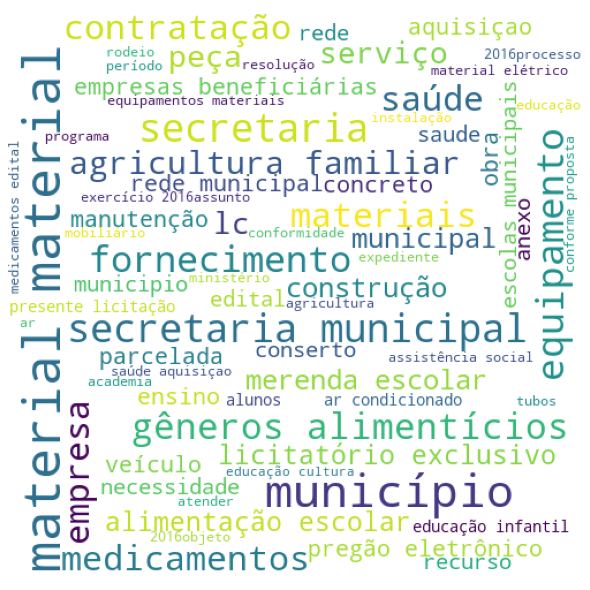

In [57]:
nuvem_palavras(licitacoes_licitante_proposta.DS_OBJETO)

# Carregando o arquivo de itens

In [58]:
itens=pd.read_csv('2016/item.csv', sep = ',', low_memory=False)

# Checando as colunas de itens para saber quais estão em comum com o dataframe de licitações, licitantes e propostas

In [59]:
print(itens.columns.values)

['CD_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO' 'CD_TIPO_MODALIDADE' 'NR_LOTE'
 'NR_ITEM' 'NR_ITEM_ORIGINAL' 'DS_ITEM' 'QT_ITENS' 'SG_UNIDADE_MEDIDA'
 'VL_UNITARIO_ESTIMADO' 'VL_TOTAL_ESTIMADO' 'DT_REF_VALOR_ESTIMADO'
 'PC_BDI_ESTIMADO' 'PC_ENCARGOS_SOCIAIS_ESTIMADO' 'CD_FONTE_REFERENCIA'
 'DS_FONTE_REFERENCIA' 'TP_RESULTADO_ITEM' 'VL_UNITARIO_HOMOLOGADO'
 'VL_TOTAL_HOMOLOGADO' 'PC_BDI_HOMOLOGADO'
 'PC_ENCARGOS_SOCIAIS_HOMOLOGADO' 'TP_ORCAMENTO' 'CD_TIPO_FAMILIA'
 'CD_TIPO_SUBFAMILIA' 'TP_DOCUMENTO' 'NR_DOCUMENTO' 'TP_DOCUMENTO.1'
 'NR_DOCUMENTO.1' 'TP_BENEFICIO_MICRO_EPP' 'PC_TX_ESTIMADA'
 'PC_TX_HOMOLOGADA']


# Juntando os dataframes de acordo com as colunas que estão em comum entre os dataframes

In [60]:
itens_licitacoes_licitante_proposta = pd.merge(licitacoes_licitante_proposta, itens, on=['CD_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_DOCUMENTO'])

In [61]:
itens_licitacoes_licitante_proposta

CD_ORGAO                NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
0         86800  PM DE BOA VISTA DO SUL           4.0           2016   
1         86800  PM DE BOA VISTA DO SUL           4.0           2016   
2         47701           CM DE ESTRELA           1.0           2016   
3         77200       PM DE MATO LEITÃO           3.0           2016   
4         77200       PM DE MATO LEITÃO          10.0           2016   
...         ...                     ...           ...            ...   
12093     54900      PM DE PORTO ALEGRE         405.0           2016   
12094     54900      PM DE PORTO ALEGRE         405.0           2016   
12095     53500            PM DE OSÓRIO          11.0           2016   
12096     78200   PM DE NOVA SANTA RITA          31.0           2016   
12097     78200   PM DE NOVA SANTA RITA          31.0           2016   

      CD_TIPO_MODALIDADE      NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
0                    PRP              011         2016       COM   
1                    PRP              011         2016       COM   
2                    PRP             6762         2016       COM   
3                    PRP              014         2016       COM   
4                    PRP              071         2016       COM   
...                  ...              ...          ...       ...   
12093                PRE  001.008672.16.4         2016       COM   
12094                PRE  001.008672.16.4         2016       COM   
12095                PRE           244246         2016       COM   
12096                PRE             4125         2016       COM   
12097                PRE             4125         2016       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... PC_ENCARGOS_SOCIAIS_HOMOLOGADO  \
0                    ADH          MPR  ...                            NaN   
1                    ADH          MPR  ...                            NaN   
2                    ADH          MPR  ...                            NaN   
3                    ADH          MPR  ...                            NaN   
4                    ADH          MPR  ...                            NaN   
...                  ...          ...  ...                            ...   
12093                ADH          MPR  ...                            0.0   
12094                ADH          MPR  ...                            0.0   
12095                ADH          MPR  ...                            NaN   
12096                ADH          MPR  ...                            NaN   
12097                ADH          MPR  ...                            NaN   

       TP_ORCAMENTO  CD_TIPO_FAMILIA CD_TIPO_SUBFAMILIA  TP_DOCUMENTO  \
0               NaN              NaN                NaN             J   
1               NaN              NaN                NaN             J   
2                 E            593.0              177.0             J   
3               NaN            595.0              500.0             J   
4               NaN            465.0                6.0             J   
...             ...              ...                ...           ...   
12093           NaN              NaN                NaN             J   
12094           NaN              NaN                NaN             J   
12095           NaN              NaN                NaN             J   
12096           NaN              NaN                NaN             J   
12097           NaN              NaN                NaN             J   

      TP_DOCUMENTO.1  NR_DOCUMENTO.1  TP_BENEFICIO_MICRO_EPP PC_TX_ESTIMADA  \
0                NaN             NaN                     NaN            NaN   
1                NaN             NaN                     NaN            NaN   
2                NaN             NaN                     NaN            NaN   
3                NaN             NaN                     NaN            NaN   
4                NaN             NaN                     NaN            NaN   
...              ...             ...             

# Checando os valores faltantes

In [62]:
print("Missing values: ", itens_licitacoes_licitante_proposta.isnull().sum())

Missing values:  CD_ORGAO                              0
NM_ORGAO                              0
NR_LICITACAO                          0
ANO_LICITACAO                         0
CD_TIPO_MODALIDADE                    0
NR_PROCESSO                           0
ANO_PROCESSO                          0
TP_OBJETO                             0
CD_TIPO_FASE_ATUAL                    0
TP_LICITACAO                          0
DS_OBJETO                             0
VL_LICITACAO                          0
NR_DOCUMENTO                          0
DT_PROPOSTA                           0
VL_TOTAL_PROPOSTA                     0
TP_RESULTADO_PROPOSTA                 0
NR_LOTE                               0
NR_ITEM                               0
NR_ITEM_ORIGINAL                      0
DS_ITEM                               0
QT_ITENS                              0
SG_UNIDADE_MEDIDA                     0
VL_UNITARIO_ESTIMADO                270
VL_TOTAL_ESTIMADO                   270
DT_REF_VALOR_ESTIMADO  

# Criando o novo dataframde com as colunas que não tem dados faltantes + as colunas de valores homologados

In [63]:
item = itens_licitacoes_licitante_proposta.loc[:,['CD_ORGAO', 'NM_ORGAO', 'NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_PROCESSO', 'ANO_PROCESSO', 'TP_OBJETO', 'CD_TIPO_FASE_ATUAL', 'TP_LICITACAO', 'DS_OBJETO', 'VL_LICITACAO', 'NR_DOCUMENTO', 'DT_PROPOSTA', 'VL_TOTAL_PROPOSTA', 'TP_RESULTADO_PROPOSTA', 'NR_LOTE', 'NR_ITEM', 'NR_ITEM_ORIGINAL', 'DS_ITEM', 'QT_ITENS', 'SG_UNIDADE_MEDIDA', 'VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO', 'TP_DOCUMENTO']]

# Removendo as linhas que não possuem os valores homologados

In [64]:
item = item.dropna(subset=['VL_UNITARIO_HOMOLOGADO', 'VL_TOTAL_HOMOLOGADO'])

In [65]:
item

CD_ORGAO                NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
0         86800  PM DE BOA VISTA DO SUL           4.0           2016   
1         86800  PM DE BOA VISTA DO SUL           4.0           2016   
2         47701           CM DE ESTRELA           1.0           2016   
3         77200       PM DE MATO LEITÃO           3.0           2016   
4         77200       PM DE MATO LEITÃO          10.0           2016   
...         ...                     ...           ...            ...   
12093     54900      PM DE PORTO ALEGRE         405.0           2016   
12094     54900      PM DE PORTO ALEGRE         405.0           2016   
12095     53500            PM DE OSÓRIO          11.0           2016   
12096     78200   PM DE NOVA SANTA RITA          31.0           2016   
12097     78200   PM DE NOVA SANTA RITA          31.0           2016   

      CD_TIPO_MODALIDADE      NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
0                    PRP              011         2016       COM   
1                    PRP              011         2016       COM   
2                    PRP             6762         2016       COM   
3                    PRP              014         2016       COM   
4                    PRP              071         2016       COM   
...                  ...              ...          ...       ...   
12093                PRE  001.008672.16.4         2016       COM   
12094                PRE  001.008672.16.4         2016       COM   
12095                PRE           244246         2016       COM   
12096                PRE             4125         2016       COM   
12097                PRE             4125         2016       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... TP_RESULTADO_PROPOSTA  NR_LOTE  \
0                    ADH          MPR  ...                     C        1   
1                    ADH          MPR  ...                     C        1   
2                    ADH          MPR  ...                     C        1   
3                    ADH          MPR  ...                     C        1   
4                    ADH          MPR  ...                     C        1   
...                  ...          ...  ...                   ...      ...   
12093                ADH          MPR  ...                     C        1   
12094                ADH          MPR  ...                     C        1   
12095                ADH          MPR  ...                     C        1   
12096                ADH          MPR  ...                     C        1   
12097                ADH          MPR  ...                     C        2   

       NR_ITEM NR_ITEM_ORIGINAL  \
0            2                2   
1            1                1   
2            1                1   
3            1                1   
4            1                1   
...        ...              ...   
12093        2                2   
12094        1                1   
12095        1                1   
12096        1                1   
12097        1                1   

                                                 DS_ITEM QT_ITENS  \
0      LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...      2.0   
1      LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...     10.0   
2                        Aquisição Plataforma Elevatória      1.0   
3      compra de 1 motocicleta, para o programa SUA N...      1.0   
4      Compra de cerca e portão de PVC para o Muro da...      1.0   
...                                                  ...      ...   
12093  IMPRESSORA LASER MONO (PMAT), CFEESPANEXA, CON...      8.0   
12094  IMPRESSORA LASER MONO MULTIFUNCIONAL,CFE ESP A...     27.0   
12095  AQUISIÇÃO DE HARDWARE SERVIDOR COM A FINALIDAD...      1.0   
12096                                      Rancho Tipo 1    700.0   
12097                                      Rancho Tipo 2    300.0   

       SG_UNIDADE_MEDIDA  VL_UNITARIO_HOMOLOGADO VL_TOTAL_HOMOLOGADO  \
0                     UN                 1060.00             2120.00   
1     

In [66]:
print("Missing values: ", item.isnull().sum())

Missing values:  CD_ORGAO                  0
NM_ORGAO                  0
NR_LICITACAO              0
ANO_LICITACAO             0
CD_TIPO_MODALIDADE        0
NR_PROCESSO               0
ANO_PROCESSO              0
TP_OBJETO                 0
CD_TIPO_FASE_ATUAL        0
TP_LICITACAO              0
DS_OBJETO                 0
VL_LICITACAO              0
NR_DOCUMENTO              0
DT_PROPOSTA               0
VL_TOTAL_PROPOSTA         0
TP_RESULTADO_PROPOSTA     0
NR_LOTE                   0
NR_ITEM                   0
NR_ITEM_ORIGINAL          0
DS_ITEM                   0
QT_ITENS                  0
SG_UNIDADE_MEDIDA         0
VL_UNITARIO_HOMOLOGADO    0
VL_TOTAL_HOMOLOGADO       0
TP_DOCUMENTO              0
dtype: int64


In [150]:
item.to_csv('2016/arquivo_2016.txt')

# Observando a estatistica das colunas numéricas do novo dataframe

In [67]:
item.describe()

CD_ORGAO  NR_LICITACAO  ANO_LICITACAO  VL_LICITACAO  NR_DOCUMENTO  \
count  12093.000000  1.209300e+04        12093.0  1.209300e+04  1.209300e+04   
mean   61434.273712  8.336957e+03         2016.0  2.730641e+05  2.583620e+13   
std    12216.010561  9.093536e+05            0.0  1.082195e+06  3.334442e+13   
min    40300.000000  1.000000e+00         2016.0  0.000000e+00  2.101871e+08   
25%    55100.000000  8.000000e+00         2016.0  7.919400e+03  4.429693e+12   
50%    59800.000000  2.200000e+01         2016.0  3.096245e+04  1.037801e+13   
75%    71400.000000  4.700000e+01         2016.0  9.067000e+04  2.168106e+13   
max    88265.000000  1.000000e+08         2016.0  3.249369e+07  9.833807e+13   

       VL_TOTAL_PROPOSTA       NR_LOTE        NR_ITEM      QT_ITENS  \
count       1.209300e+04  12093.000000   12093.000000  1.209300e+04   
mean        1.281482e+05      0.944265   27915.804102  2.360359e+03   
std         5.313482e+05      1.113863   76573.330959  2.860960e+04   
min         3.530000e+00      0.000000       1.000000  5.500000e-01   
25%         8.422300e+03      1.000000       9.000000  5.000000e+00   
50%         2.133110e+04      1.000000      29.000000  3.000000e+01   
75%         6.019150e+04      1.000000      83.000000  2.400000e+02   
max         2.901000e+07     32.000000  288946.000000  2.540000e+06   

       VL_UNITARIO_HOMOLOGADO  
count            1.209300e+04  
mean             4.520120e+03  
std              2.667496e+05  
min              0.000000e+00  
25%              2.590000e+00  
50%              8.960000e+00  
75%              5.683000e+01  
max              2.901000e+07

# Testando se a nuvem de palavras apresenta palavras que fazem sentido no contexto, a fim de obter informações sobre os itens comprados

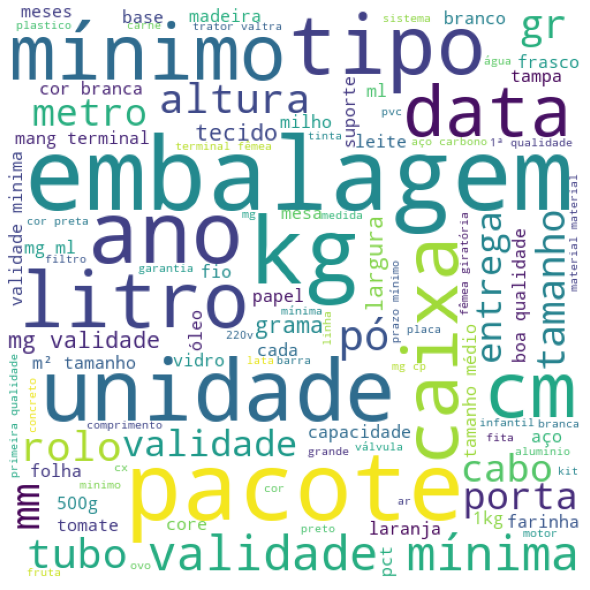

In [68]:
nuvem_palavras(item.DS_ITEM)

### Como pôde ser visto na nuvem, algumas palavras fazem sentido, mas existem outras que devem ser usadas como stop words e não devem ser levadas em consideração, como por exemplo, kg, gr, mm, altura, grama, etc. Portanto, irei testar outro caminho que seria através da frequência das palavras que mais aparecem.

In [69]:
item.DS_ITEM

0        LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...
1        LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...
2                          Aquisição Plataforma Elevatória
3        compra de 1 motocicleta, para o programa SUA N...
4        Compra de cerca e portão de PVC para o Muro da...
                               ...                        
12093    IMPRESSORA LASER MONO (PMAT), CFEESPANEXA, CON...
12094    IMPRESSORA LASER MONO MULTIFUNCIONAL,CFE ESP A...
12095    AQUISIÇÃO DE HARDWARE SERVIDOR COM A FINALIDAD...
12096                                        Rancho Tipo 1
12097                                        Rancho Tipo 2
Name: DS_ITEM, Length: 12093, dtype: object

# Convertendo todas as palavras em minúsculas para que uma mesma palavra não seja contabilizada em 2 chaves de dicionário distintas

In [70]:
minusculas = item["DS_ITEM"].to_string().lower()

In [71]:
minusculas

'0        lousa/quadro escolar com moldura de alumínio -...\n1        lousa/quadro escolar com moldura de alumínio -...\n2                          aquisição plataforma elevatória\n3        compra de 1 motocicleta, para o programa sua n...\n4        compra de cerca e portão de pvc para o muro da...\n5        envelope branco medindo aproximadamente 34cm x...\n6        pasta pauta sulfite 75gr amarelo-claro, impres...\n7        etiquetas adesivas em papel adesivo branco ou ...\n8        cartão convite em papel linho branco 180gr, ta...\n9        envelope branco em papel cartão 120gr. (envelo...\n10       pasta pauta sulfite 75gr verde-claro, impressã...\n11       cartões de visita papel couché fosco 300gr com...\n12       folha timbrada branca offset 90 gramas, tamanh...\n13                                      camisa masc n.1 ml\n14                                      camisa masc n.2 ml\n15                                      camisa masc n.3 ml\n16                                     

# Splitando a string e armazenando em uma lista de palavras

In [72]:
lista = minusculas.split()

In [73]:
lista

['0',
 'lousa/quadro',
 'escolar',
 'com',
 'moldura',
 'de',
 'alumínio',
 '-...',
 '1',
 'lousa/quadro',
 'escolar',
 'com',
 'moldura',
 'de',
 'alumínio',
 '-...',
 '2',
 'aquisição',
 'plataforma',
 'elevatória',
 '3',
 'compra',
 'de',
 '1',
 'motocicleta,',
 'para',
 'o',
 'programa',
 'sua',
 'n...',
 '4',
 'compra',
 'de',
 'cerca',
 'e',
 'portão',
 'de',
 'pvc',
 'para',
 'o',
 'muro',
 'da...',
 '5',
 'envelope',
 'branco',
 'medindo',
 'aproximadamente',
 '34cm',
 'x...',
 '6',
 'pasta',
 'pauta',
 'sulfite',
 '75gr',
 'amarelo-claro,',
 'impres...',
 '7',
 'etiquetas',
 'adesivas',
 'em',
 'papel',
 'adesivo',
 'branco',
 'ou',
 '...',
 '8',
 'cartão',
 'convite',
 'em',
 'papel',
 'linho',
 'branco',
 '180gr,',
 'ta...',
 '9',
 'envelope',
 'branco',
 'em',
 'papel',
 'cartão',
 '120gr.',
 '(envelo...',
 '10',
 'pasta',
 'pauta',
 'sulfite',
 '75gr',
 'verde-claro,',
 'impressã...',
 '11',
 'cartões',
 'de',
 'visita',
 'papel',
 'couché',
 'fosco',
 '300gr',
 'com...',


# Os índices da coluna do dataframe também entraram na string e consequentemente na lista, então aqui vou removê-los

In [74]:
novos_items = [item for item in lista if not item.isdigit()]

In [75]:
novos_items

['lousa/quadro',
 'escolar',
 'com',
 'moldura',
 'de',
 'alumínio',
 '-...',
 'lousa/quadro',
 'escolar',
 'com',
 'moldura',
 'de',
 'alumínio',
 '-...',
 'aquisição',
 'plataforma',
 'elevatória',
 'compra',
 'de',
 'motocicleta,',
 'para',
 'o',
 'programa',
 'sua',
 'n...',
 'compra',
 'de',
 'cerca',
 'e',
 'portão',
 'de',
 'pvc',
 'para',
 'o',
 'muro',
 'da...',
 'envelope',
 'branco',
 'medindo',
 'aproximadamente',
 '34cm',
 'x...',
 'pasta',
 'pauta',
 'sulfite',
 '75gr',
 'amarelo-claro,',
 'impres...',
 'etiquetas',
 'adesivas',
 'em',
 'papel',
 'adesivo',
 'branco',
 'ou',
 '...',
 'cartão',
 'convite',
 'em',
 'papel',
 'linho',
 'branco',
 '180gr,',
 'ta...',
 'envelope',
 'branco',
 'em',
 'papel',
 'cartão',
 '120gr.',
 '(envelo...',
 'pasta',
 'pauta',
 'sulfite',
 '75gr',
 'verde-claro,',
 'impressã...',
 'cartões',
 'de',
 'visita',
 'papel',
 'couché',
 'fosco',
 '300gr',
 'com...',
 'folha',
 'timbrada',
 'branca',
 'offset',
 'gramas,',
 'tamanh...',
 'camisa'

# Contando a frequência de cada palavra da lista e armazenando em um dicionário onde as chaves são as palavras e os valores são as frequências

In [76]:
import collections
contagens = dict(collections.Counter(novos_items))

In [77]:
contagens

{'lousa/quadro': 2,
 'escolar': 19,
 'com': 1291,
 'moldura': 3,
 'de': 4599,
 'alumínio': 17,
 '-...': 24,
 'aquisição': 87,
 'plataforma': 4,
 'elevatória': 1,
 'compra': 4,
 'motocicleta,': 1,
 'para': 826,
 'o': 45,
 'programa': 6,
 'sua': 1,
 'n...': 7,
 'cerca': 1,
 'e': 461,
 'portão': 1,
 'pvc': 142,
 'muro': 1,
 'da...': 5,
 'envelope': 20,
 'branco': 99,
 'medindo': 34,
 'aproximadamente': 7,
 '34cm': 1,
 'x...': 6,
 'pasta': 59,
 'pauta': 2,
 'sulfite': 7,
 '75gr': 3,
 'amarelo-claro,': 1,
 'impres...': 3,
 'etiquetas': 3,
 'adesivas': 1,
 'em': 883,
 'papel': 163,
 'adesivo': 22,
 'ou': 85,
 '...': 737,
 'cartão': 4,
 'convite': 2,
 'linho': 1,
 '180gr,': 1,
 'ta...': 6,
 '120gr.': 1,
 '(envelo...': 1,
 'verde-claro,': 1,
 'impressã...': 1,
 'cartões': 1,
 'visita': 3,
 'couché': 1,
 'fosco': 3,
 '300gr': 6,
 'com...': 34,
 'folha': 26,
 'timbrada': 3,
 'branca': 85,
 'offset': 2,
 'gramas,': 9,
 'tamanh...': 2,
 'camisa': 58,
 'masc': 9,
 'n.1': 1,
 'ml': 212,
 'n.2': 1,
 

# Ordenando o dicionário do maior para o menor para uma melhor visualização

In [112]:
contagens_ordenadas = dict(sorted(contagens.items(), key=lambda x: x[1], reverse=True))

In [79]:
contagens_ordenadas

{'de': 4599,
 'com': 1291,
 '-': 1162,
 'em': 883,
 'para': 826,
 '...': 737,
 'e': 461,
 'x': 434,
 'mg': 429,
 'tipo': 427,
 'embalagem': 278,
 'tecido': 253,
 'c/': 251,
 'sem': 221,
 'ml': 212,
 'pacote': 206,
 'mm': 205,
 'kg': 198,
 'validade': 195,
 'a': 193,
 'tamanho': 192,
 'mínima': 180,
 '¿': 168,
 'papel': 163,
 'caixa': 159,
 'cor': 154,
 'pneu': 151,
 'cm': 149,
 'tubo': 146,
 'p/': 145,
 'material': 144,
 'm': 143,
 'pvc': 142,
 'g': 140,
 'pó': 135,
 'ano.': 135,
 'gr': 134,
 'terminal': 129,
 'fita': 126,
 'confeccionada': 123,
 'nº': 122,
 'no': 117,
 'doce': 116,
 'frasco': 114,
 'óleo': 111,
 'leite': 110,
 'carne': 109,
 'fio': 108,
 'cabo': 107,
 'broca': 105,
 'do': 105,
 'comprimido': 104,
 'bucha': 104,
 'farinha': 103,
 'aço': 100,
 'luva': 100,
 'biscoito': 100,
 'branco': 99,
 'qualidade,': 99,
 'boa': 98,
 'verde': 97,
 'litros': 95,
 'c...': 95,
 'preto': 95,
 'milho': 94,
 'rolo': 88,
 'concreto': 88,
 'aquisição': 87,
 '+': 87,
 'qualidade': 87,
 'médio

# Criando a lista de palavras que não deve ser contabilizada

In [113]:
# Lista de palavras que não serão contabilizadas
novas_stopwords = ["de", "da", "do", "para", "dos", "das", "cor", "...", "tamanho",
                    "em", "aquisição", "por", "preço", "registro", "mm", "cm", "ano.",
                    "preços", "um", "através", "na", "no", "ou", "a", "kg", "ml", "gr",
                    "compra", "uso", "com", "x", "e", "-", "¿", "qualidade,", "m", "g", "validade",
                    "nº","processo", "p/", "c/", "100%", "tipo", "sem", "mg", "mínima", "confeccionada"]

# Removendo as stop words do dicionário

In [114]:
for chave in novas_stopwords:
    contagens_ordenadas.pop(chave)

In [115]:
contagens_ordenadas

{'embalagem': 278,
 'tecido': 253,
 'pacote': 206,
 'papel': 163,
 'caixa': 159,
 'pneu': 151,
 'tubo': 146,
 'material': 144,
 'pvc': 142,
 'pó': 135,
 'terminal': 129,
 'fita': 126,
 'doce': 116,
 'frasco': 114,
 'óleo': 111,
 'leite': 110,
 'carne': 109,
 'fio': 108,
 'cabo': 107,
 'broca': 105,
 'comprimido': 104,
 'bucha': 104,
 'farinha': 103,
 'aço': 100,
 'luva': 100,
 'biscoito': 100,
 'branco': 99,
 'boa': 98,
 'verde': 97,
 'litros': 95,
 'c...': 95,
 'preto': 95,
 'milho': 94,
 'rolo': 88,
 'concreto': 88,
 '+': 87,
 'qualidade': 87,
 'médio': 86,
 'branca': 85,
 'ar': 85,
 'cloridrato': 80,
 'massa': 79,
 'cartucho': 77,
 'sae': 76,
 'mesa': 73,
 'unidades': 72,
 'de...': 71,
 'fêmea': 71,
 '1ª': 70,
 'cores': 70,
 'as': 70,
 'mangueira': 69,
 'd...': 68,
 'ponta': 68,
 'giratória': 68,
 'madeira': 68,
 'tinta': 68,
 'sabor': 66,
 'hp': 66,
 'manga': 66,
 'solução': 65,
 'fermento': 64,
 'cola': 64,
 'anel': 63,
 'pão': 63,
 'filtro': 63,
 'integral': 62,
 'motor': 62,
 'c

# Selecionando as 15 palavras com mais frequência para fazer um gráfico de barras

In [116]:
import itertools
itens_despesas = dict(itertools.islice(contagens_ordenadas.items(), 0, 15))

In [117]:
itens_despesas

{'embalagem': 278,
 'tecido': 253,
 'pacote': 206,
 'papel': 163,
 'caixa': 159,
 'pneu': 151,
 'tubo': 146,
 'material': 144,
 'pvc': 142,
 'pó': 135,
 'terminal': 129,
 'fita': 126,
 'doce': 116,
 'frasco': 114,
 'óleo': 111}

# Gráfico de barras com as palavras que aparecem com mais frequência na descrição dos itens, assim podemos saber os itens que estão relacionados com os maiores gastos

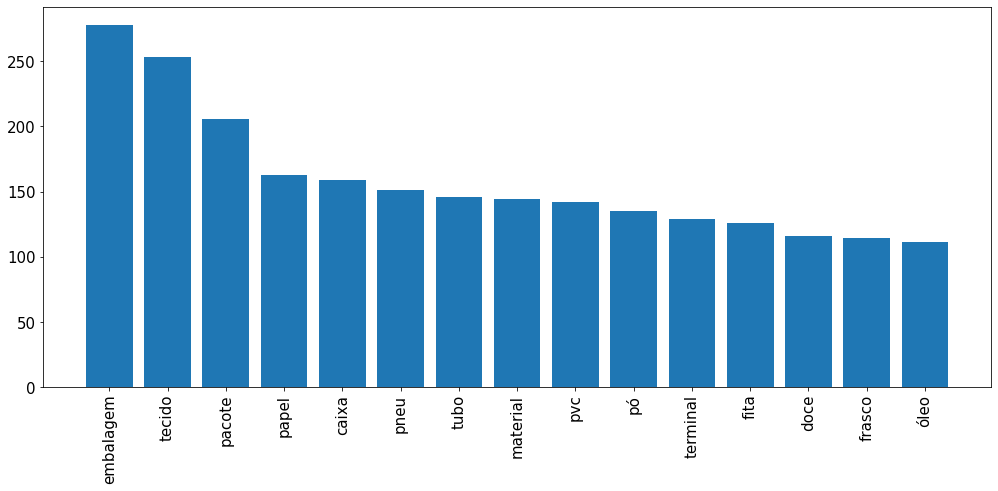

In [118]:
keys = itens_despesas.keys()
values = itens_despesas.values()
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(17,7))
plt.bar(keys, values)
plt.xticks(range(15), rotation='vertical')
plt.show()

# Usando a Lei de Benford para estudar as amostras do mesmo tipo, buscando encontrar dados inconsistêntes, errôneos ou até mesmo fraudes

In [32]:
!pip3 install benford_py

  Created wheel for benford-py: filename=benford_py-0.2.7-py3-none-any.whl size=24789 sha256=79ee412e021a2542839b72d95821441971330c814553ec4f2e2bf18566f1ead7
  Stored in directory: /home/thais/.cache/pip/wheels/af/ec/0c/d9bfd4f0d6899acd3a749a9a67217104015d65e7c5da1ac6a4
Successfully built benford-py


In [119]:
import benford as bf

# Fazendo o estudo relacionado aos valores homologados dos itens

In [123]:
item_bf = pd.to_numeric(item['VL_TOTAL_HOMOLOGADO'],errors='coerce')

### Aqui estou levando em consideração os primeiros 2 dígitos (10 - 99). Os dígitos em amarelo são os dígitos considerados inconsistentes, ou seja, esse dígitos acharam inconsistência nos dados


Initialized sequence with 12077 registries.
First_2_Dig
10    0.037261
11    0.035522
12    0.036102
13    0.028153
14    0.029478
15    0.030223
16    0.025586
17    0.025420
18    0.026911
19    0.026497
20    0.022025
21    0.017140
22    0.016395
23    0.017140
24    0.020204
25    0.015567
26    0.014987
27    0.016560
28    0.012420
29    0.014656
30    0.018630
31    0.012338
32    0.012089
33    0.011675
34    0.012420
35    0.013662
36    0.010847
37    0.011178
38    0.009771
39    0.012255
40    0.015650
41    0.007369
42    0.009522
43    0.008115
44    0.009688
45    0.011261
46    0.009108
47    0.007701
48    0.010350
49    0.009025
50    0.010930
51    0.007783
52    0.007452
53    0.005548
54    0.008611
55    0.008197
56    0.007783
57    0.006459
58    0.008032
59    0.007949
60    0.012338
61    0.003726
62    0.005796
63    0.005051
64    0.005548
65    0.005631
66    0.005299
67    0.005382
68    0.005879
69    0.006707
70    0.010019
71    0.005051
72    0.00852

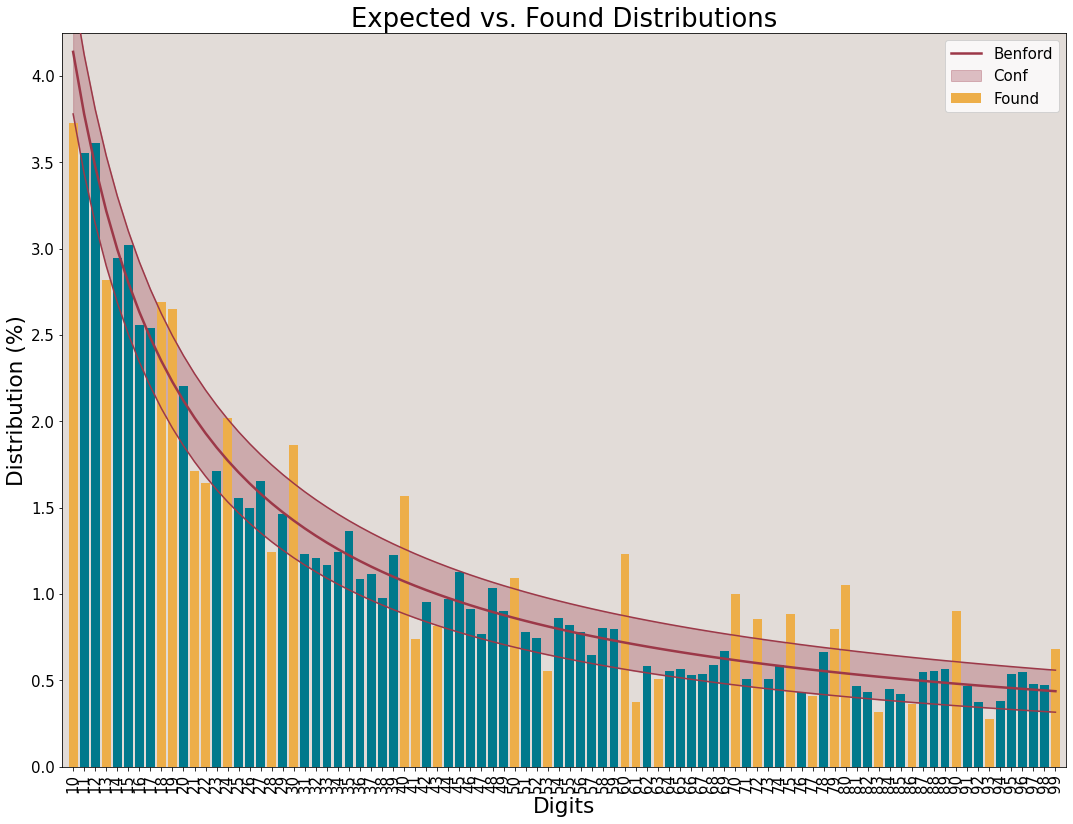

In [124]:
f2d = bf.first_digits(item_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (80, 60 e 90)

In [126]:
itens_digitos = item

# Convertendo a coluna de float para string

In [127]:
itens_digitos['VL_TOTAL_HOMOLOGADO'] = itens_digitos['VL_TOTAL_HOMOLOGADO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 80, 60 e 90

In [133]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_HOMOLOGADO'].str.startswith(('80', '60', '90'))])

In [134]:
dados_incosistentes

CD_ORGAO                                           NM_ORGAO  \
58        53411  INST. DE PREV. E ASSIST. DOS SERV. MUNIC. DE N...   
78        53411  INST. DE PREV. E ASSIST. DOS SERV. MUNIC. DE N...   
112       45004                   CIA. DE DESENV. DE CAXIAS DO SUL   
127       45004                   CIA. DE DESENV. DE CAXIAS DO SUL   
165       45004                   CIA. DE DESENV. DE CAXIAS DO SUL   
185       45004                   CIA. DE DESENV. DE CAXIAS DO SUL   
242       45004                   CIA. DE DESENV. DE CAXIAS DO SUL   
276       47700                                      PM DE ESTRELA   
285       79400                              PM DE PORTO VERA CRUZ   
306       79400                              PM DE PORTO VERA CRUZ   
320       79400                              PM DE PORTO VERA CRUZ   
345       79400                              PM DE PORTO VERA CRUZ   
380       79400                              PM DE PORTO VERA CRUZ   
383       79400                              PM DE PORTO VERA CRUZ   
396       79400                              PM DE PORTO VERA CRUZ   
399       79400                              PM DE PORTO VERA CRUZ   
421       79400                              PM DE PORTO VERA CRUZ   
456       47500                               PM DE ESTÂNCIA VELHA   
547       55900                                PM DE RODEIO BONITO   
553       55900                                PM DE RODEIO BONITO   
609       40300                                      PM DE ALECRIM   
722       80700                         PM DE SÃO JOSÉ DO INHACORÁ   
851       88047                                     PM DE TIO HUGO   
902       88027                                PM DE CAPÃO DO CIPÓ   
926       88035                                PM DE MATO QUEIMADO   
934       50300                                PM DE INDEPENDÊNCIA   
989       50300                                PM DE INDEPENDÊNCIA   
1045      40300                                      PM DE ALECRIM   
1053      40300                                      PM DE ALECRIM   
1062      40300                                      PM DE ALECRIM   
1065      40300                                      PM DE ALECRIM   
1076      40300                                      PM DE ALECRIM   
1112      40300                                      PM DE ALECRIM   
1117      40300                                      PM DE ALECRIM   
1118      40300                                      PM DE ALECRIM   
1125      40300                                      PM DE ALECRIM   
1126      40300                                      PM DE ALECRIM   
1127      40300                                      PM DE ALECRIM   
1138      40300                                      PM DE ALECRIM   
1141      40300                                      PM DE ALECRIM   
1145      40300                                      PM DE ALECRIM   
1152      40300                                      PM DE ALECRIM   
1198      40300                                      PM DE ALECRIM   
1216      40300                                      PM DE ALECRIM   
1228      40300                                      PM DE ALECRIM   
1286      55400                                    PM DE REDENTORA   
1331      79300                                   PM DE PORTO MAUÁ   
1341      79300                                   PM DE PORTO MAUÁ   
1342      79300                                   PM DE PORTO MAUÁ   
1416      79300                                   PM DE PORTO MAUÁ   
1421      79300                                   PM DE PORTO MAUÁ   
1423      79300                                   PM DE PORTO MAUÁ   
1425      79300                                   PM DE PORTO MAUÁ   
1442      79300                                   PM DE PORTO MAUÁ   
1463      79300                                   PM DE PORTO MAUÁ   
1486      79300                                   PM DE PORTO MAUÁ   
1494      79300  

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_HOMOLOGADO

In [135]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE RIO GRANDE                                            71
PM DE SÃO VICENTE DO SUL                                    31
PM DE TUPARENDI                                             24
PM DE PORTO MAUÁ                                            20
PM DE ALECRIM                                               20
PM DE FREDERICO WESTPHALEN                                  13
PM DE UNIÃO DA SERRA                                        12
PM DE PORTO VERA CRUZ                                       10
CIA. DE DESENV. DE CAXIAS DO SUL                             9
PM DE SÃO NICOLAU                                            9
PM DE CAMPOS BORGES                                          9
PM DE ERNESTINA                                              8
PM DE SANTO CRISTO                                           7
PM DE VIAMÃO                                                 6
PM DE ARROIO DO TIGRE                                        5
PM DE CAPÃO DO CIPÓ                                    

# Fazendo o estudo relacionado aos valores totais das propostas

In [136]:
total_proposta_bf = item.VL_TOTAL_PROPOSTA


Initialized sequence with 12093 registries.
First_2_Dig
10    0.026462
11    0.030844
12    0.029025
13    0.013148
14    0.045894
15    0.031506
16    0.020756
17    0.034400
18    0.035062
19    0.029769
20    0.010998
21    0.024146
22    0.014719
23    0.028942
24    0.022492
25    0.025304
26    0.010998
27    0.011660
28    0.009427
29    0.006615
30    0.010998
31    0.029108
32    0.013313
33    0.007608
34    0.013892
35    0.010915
36    0.009758
37    0.009840
38    0.015133
39    0.011825
40    0.009179
41    0.007938
42    0.013644
43    0.005127
44    0.009510
45    0.003473
46    0.009013
47    0.008931
48    0.008352
49    0.011081
50    0.003721
51    0.003473
52    0.003969
53    0.025965
54    0.009262
55    0.008435
56    0.011246
57    0.012321
58    0.003225
59    0.009262
60    0.009013
61    0.002977
62    0.008517
63    0.008848
64    0.001654
65    0.006615
66    0.000662
67    0.002894
68    0.004548
69    0.002894
70    0.002977
71    0.003556
72    0.00248

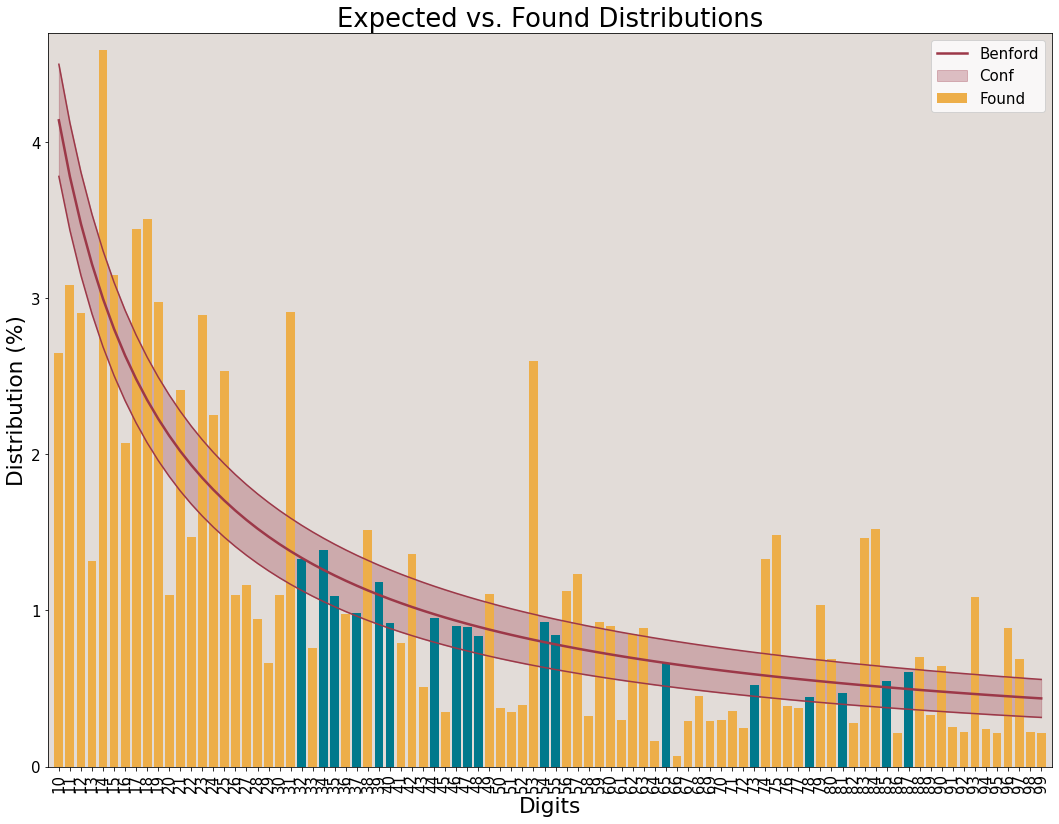

In [137]:
f2d = bf.first_digits(total_proposta_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (53, 84 e 31)

In [138]:
itens_digitos = item

# Convertendo a coluna de float para string

In [139]:
itens_digitos['VL_TOTAL_PROPOSTA'] = itens_digitos['VL_TOTAL_PROPOSTA'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 53, 84 e 31

In [140]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_PROPOSTA'].str.startswith(('53', '84', '31'))])

In [141]:
dados_incosistentes

CD_ORGAO                          NM_ORGAO  NR_LICITACAO  \
5         62501                     CM DE VACARIA           2.0   
6         62501                     CM DE VACARIA           2.0   
7         62501                     CM DE VACARIA           2.0   
8         62501                     CM DE VACARIA           2.0   
9         62501                     CM DE VACARIA           2.0   
10        62501                     CM DE VACARIA           2.0   
11        62501                     CM DE VACARIA           2.0   
12        62501                     CM DE VACARIA           2.0   
32        59800          PM DE SÃO VICENTE DO SUL          10.0   
83        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
84        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
85        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
86        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
87        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
88        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
89        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
90        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
91        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
92        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
93        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
94        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
95        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
96        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
97        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
98        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
99        45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
100       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
101       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
102       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
103       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
104       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
105       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
106       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
107       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
108       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
109       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
110       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
111       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
112       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
113       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
114       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
115       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
116       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
117       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
118       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
119       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
120       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
121       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
122       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
123       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
124       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
125       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
126       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
127       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
128       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
129       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
130       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
131       45004  CIA. DE DESENV. DE CAXIAS DO SUL          33.0   
132       45004  CIA. DE DESENV. DE CAXIAS DO SUL     

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_PROPOSTA

In [142]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE RIO GRANDE                    238
CIA. DE DESENV. DE CAXIAS DO SUL    186
PM DE ERNESTINA                     113
PM DE PORTO MAUÁ                     57
PM DE CAPÃO DO CIPÓ                  51
PM DE SÃO MARTINHO                   46
PM DE RODEIO BONITO                  38
PM DE SÃO VICENTE DO SUL             24
PM DE SANTO CRISTO                   17
PM DE SAGRADA FAMÍLIA                10
PM DE FREDERICO WESTPHALEN            9
PM DE SÃO SEBASTIÃO DO CAÍ            9
CM DE VACARIA                         8
PM DE VISTA GAÚCHA                    8
PM DE SÃO MIGUEL DAS MISSÕES          6
PM DE ALECRIM                         6
PM DE TUPARENDI                       6
PM DE NOVA CANDELÁRIA                 5
PM DE SALDANHA MARINHO                3
PM DE IBIRUBÁ                         2
PM DE SEBERI                          2
PM DE ALPESTRE                        2
PM DE DOUTOR MAURÍCIO CARDOSO         1
CIA. DE DESENV. DE PASSO FUNDO        1
PM DE COTIPORÃ                        1


# Fazendo o estudo relacionado aos valores de licitação

In [143]:
vl_licitacao_bf = item.VL_LICITACAO


Initialized sequence with 9955 registries.
First_2_Dig
10    0.023707
11    0.015871
12    0.046911
13    0.034957
14    0.013059
15    0.048518
16    0.026118
17    0.021497
18    0.037067
19    0.020593
20    0.030839
21    0.030236
22    0.034254
23    0.020693
24    0.027423
25    0.019789
26    0.012255
27    0.003114
28    0.013461
29    0.006730
30    0.011251
31    0.010246
32    0.021798
33    0.032245
34    0.014867
35    0.006931
36    0.018383
37    0.016876
38    0.009141
39    0.005927
40    0.015168
41    0.011652
42    0.016374
43    0.002813
44    0.000100
45    0.000301
46    0.020794
47    0.003315
48    0.009242
49    0.000301
50    0.021798
51    0.001306
52    0.007534
53    0.002511
54    0.009643
55    0.003315
56    0.001507
57    0.001105
58    0.000201
59    0.012557
60    0.005023
61    0.001105
62    0.001909
63    0.000402
64    0.000402
65    0.003014
66    0.006630
67    0.005525
68    0.014465
69    0.000502
70    0.000603
71    0.032145
72    0.007936

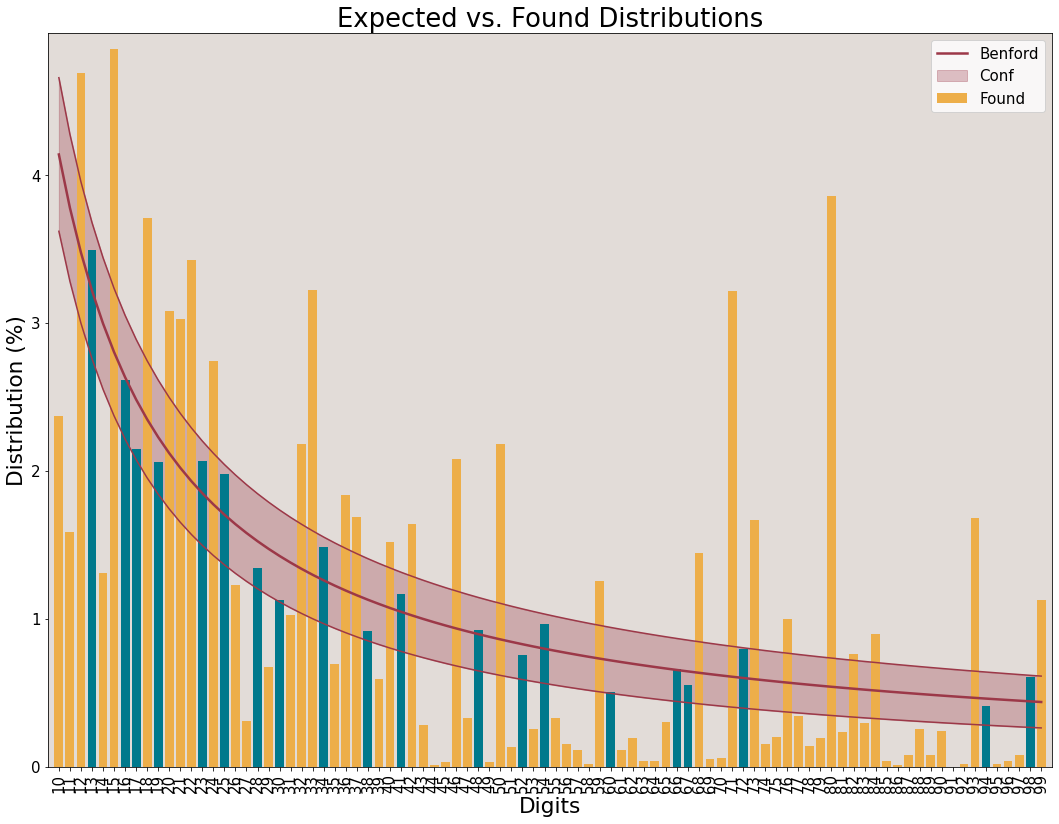

In [144]:
f2d = bf.first_digits(vl_licitacao_bf, digs=2, decimals=8, confidence=99)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (80, 71 e 93)

In [145]:
itens_digitos = item

# Convertendo a coluna de float para string

In [146]:
itens_digitos['VL_LICITACAO'] = itens_digitos['VL_LICITACAO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 80, 71 e 93

In [147]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_LICITACAO'].str.startswith(('80', '71', '93'))])

In [148]:
dados_incosistentes

CD_ORGAO                     NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  \
281       79400        PM DE PORTO VERA CRUZ           1.0           2016   
282       79400        PM DE PORTO VERA CRUZ           1.0           2016   
283       79400        PM DE PORTO VERA CRUZ           1.0           2016   
284       79400        PM DE PORTO VERA CRUZ           1.0           2016   
285       79400        PM DE PORTO VERA CRUZ           1.0           2016   
286       79400        PM DE PORTO VERA CRUZ           1.0           2016   
287       79400        PM DE PORTO VERA CRUZ           1.0           2016   
288       79400        PM DE PORTO VERA CRUZ           1.0           2016   
289       79400        PM DE PORTO VERA CRUZ           1.0           2016   
290       79400        PM DE PORTO VERA CRUZ           1.0           2016   
291       79400        PM DE PORTO VERA CRUZ           1.0           2016   
292       79400        PM DE PORTO VERA CRUZ           1.0           2016   
293       79400        PM DE PORTO VERA CRUZ           1.0           2016   
294       79400        PM DE PORTO VERA CRUZ           1.0           2016   
295       79400        PM DE PORTO VERA CRUZ           1.0           2016   
296       79400        PM DE PORTO VERA CRUZ           1.0           2016   
297       79400        PM DE PORTO VERA CRUZ           1.0           2016   
298       79400        PM DE PORTO VERA CRUZ           1.0           2016   
299       79400        PM DE PORTO VERA CRUZ           1.0           2016   
300       79400        PM DE PORTO VERA CRUZ           1.0           2016   
301       79400        PM DE PORTO VERA CRUZ           1.0           2016   
302       79400        PM DE PORTO VERA CRUZ           1.0           2016   
303       79400        PM DE PORTO VERA CRUZ           1.0           2016   
304       79400        PM DE PORTO VERA CRUZ           1.0           2016   
305       79400        PM DE PORTO VERA CRUZ           1.0           2016   
306       79400        PM DE PORTO VERA CRUZ           1.0           2016   
307       79400        PM DE PORTO VERA CRUZ           1.0           2016   
308       79400        PM DE PORTO VERA CRUZ           1.0           2016   
309       79400        PM DE PORTO VERA CRUZ           1.0           2016   
310       79400        PM DE PORTO VERA CRUZ           1.0           2016   
311       79400        PM DE PORTO VERA CRUZ           1.0           2016   
312       79400        PM DE PORTO VERA CRUZ           1.0           2016   
313       79400        PM DE PORTO VERA CRUZ           1.0           2016   
314       79400        PM DE PORTO VERA CRUZ           1.0           2016   
315       79400        PM DE PORTO VERA CRUZ           1.0           2016   
316       79400        PM DE PORTO VERA CRUZ           1.0           2016   
317       79400        PM DE PORTO VERA CRUZ           1.0           2016   
318       79400        PM DE PORTO VERA CRUZ           1.0           2016   
319       79400        PM DE PORTO VERA CRUZ           1.0           2016   
320       79400        PM DE PORTO VERA CRUZ           1.0           2016   
321       79400        PM DE PORTO VERA CRUZ           1.0           2016   
322       79400        PM DE PORTO VERA CRUZ           1.0           2016   
323       79400        PM DE PORTO VERA CRUZ           1.0           2016   
324       79400        PM DE PORTO VERA CRUZ           1.0           2016   
325       79400        PM DE PORTO VERA CRUZ           1.0           2016   
326       79400        PM DE PORTO VERA CRUZ           1.0           2016   
327       79400        PM DE PORTO VERA CRUZ           1.0           2016   
328       79400        PM DE PORTO VERA CRUZ           1.0           2016   
329       79400        PM DE PORTO VERA CRUZ           1.0           2016   
330       79400        PM DE PORTO VERA CRUZ           1.0           2016   
331       79400        PM DE PORTO VERA CRUZ           1.0           2016   
332

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_LICITACAO

In [149]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE PORTO MAUÁ               356
PM DE TUPARENDI                226
PM DE PORTO VERA CRUZ          171
PM DE SEBERI                    47
PM DE SÃO MARTINHO              25
PM DE SÃO PAULO DAS MISSÕES     15
PM DE RIO GRANDE                12
PM DE ESTRELA                    7
PM DE SOBRADINHO                 5
PM DE GIRUÁ                      4
PM DE CARLOS BARBOSA             1
PM DE SANTO CRISTO               1
PM DE SETE DE SETEMBRO           1
Name: NM_ORGAO, dtype: int64